In [66]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import Bio
from localcider.sequenceParameters import SequenceParameters
import scipy
from scipy.spatial.distance import cdist

In [3]:
path: str = './data/' #folder where files are stored
prokaryotes: pd.DataFrame = pd.read_csv(os.path.join(path, "prokaryotes_unique_prot.csv"), dtype=str)   # imports file from the folder as species, based on name
prokaryotes_all: pd.DataFrame = pd.read_csv(os.path.join(path, "prokaryotes_all.csv"), dtype=str) # imports 3rd file from the folder, based on name

In [2]:
def pdb_import(folder:str):
    file_list = os.listdir(path)
    PDB = dict()
    for file in file_list:
        file_content = np.array([])
        with open(os.path.join(path, file)) as f:
            for line in f:
                line = line.strip()
                if line.startswith('ATOM'):
                    file_content = np.append(file, line)
            PDB[file] = [file_content]

def pdb_distance(PDB:dict,Aminoacid:list):
    for n in PDB:
        PDB.get((n))
        

In [80]:
path_pdb = './data/pdbs/'
# opens pdb file and creates dictionary for amino acids contained in salt bridges
with open(os.path.join(path_pdb, 'AF-C0H3V8-F1.pdb')) as f:
    Salt= dict()
    Asp_Glu_array = np.empty((0,4))
    Lys_Arg_His_array = np.empty((0,4))
    for line in f:
        line = line.strip()
        if line.startswith('ATOM'):
            if ('ASP' in line and 'OD' in line) or ('GLU' in line and 'OE' in line):
                line_array = np.array([[line[9:11].strip(), line[27:38].strip(), line[39:46].strip(), line[47:54].strip()]])
                line_array = line_array.astype(float)
                Asp_Glu_array = np.append(Asp_Glu_array, line_array, axis = 0)
                Salt['Asp_Glu'] = Asp_Glu_array
            if ('LYS' in line and 'NZ' in line) or ('ARG' in line and 'NH' in line) or ('HIS' in line and 'NE' in line) or ('HIS' in line and 'ND' in line):
                line_array = np.array([[line[9:11].strip(), line[27:38].strip(), line[39:46].strip(), line[47:54].strip()]])
                line_array = line_array.astype(float)
                Lys_Arg_His_array = np.append(Lys_Arg_His_array, line_array, axis = 0)
                Salt['Lys_Arg_His'] = Lys_Arg_His_array

print(Asp_Glu_array.shape)
print(Lys_Arg_His_array.shape)
print(Asp_Glu_array)

#calculate distance
distance = cdist(Asp_Glu_array[:,1:], Lys_Arg_His_array[:,1:], metric='euclidean')
print(distance)

(20, 4)
(25, 4)
[[ 20.     16.768  -1.722  -1.824]
 [ 21.     18.433  -0.925  -0.589]
 [ 37.     12.319  -6.775  -4.228]
 [ 38.     13.289  -4.867  -4.927]
 [ 76.      5.4    -6.926  -5.589]
 [ 77.      6.797  -5.965  -4.177]
 [  0.      2.427  -3.75    9.427]
 [  1.      1.033  -5.125   8.465]
 [ 57.      4.65   11.94   -7.034]
 [ 58.      4.295  12.026  -9.242]
 [  8.     -5.721  -4.732  -3.671]
 [  9.     -5.803  -6.835  -3.002]
 [  1.      3.402  12.037   3.076]
 [  2.      3.967  12.428   0.974]
 [ 21.     12.133   4.501  -2.84 ]
 [ 22.     12.701   5.901  -1.206]
 [ 17.      9.229  -9.656 -12.273]
 [ 18.      9.203  -7.935 -10.874]
 [ 26.     11.552 -13.294  -1.612]
 [ 27.     10.795 -11.232  -1.622]]


IndexError: arrays used as indices must be of integer (or boolean) type

No random seed specified. Using generated random seed: 1716984995

Number of amino acid groupings used for Nardini z-score analysis: 8

Amino acid groupings used for Nardini z-score analysis: 

		POLAR           ['C', 'H', 'N', 'Q', 'S', 'T']
		HYDROPHOBIC     ['I', 'L', 'M', 'V']
		POSITIVE        ['K', 'R']
		NEGATIVE        ['D', 'E']
		AROMATIC        ['F', 'W', 'Y']
		ALANINE         ['A']
		PROLINE         ['P']
		GLYCINE         ['G']


[ FASTA seq1 : MADKDFGLNDIVEMKKPHPCGANSWKIIRMGMDIRIKCEGCSHSVMIPRREFERKLKKVLVKHEEPTS ]
[ SEQ: seq1 | START ] Beginning analysis of FASTA sequence: "seq1"...

[ SEQ: seq1 | 1 / 8 ] Analyzing original sequence...
[ SEQ: seq1 | 2 / 8 ] Analysis of original sequence complete.
[ SEQ: seq1 | 3 / 8 ] Performing analysis of 100000 scrambled sequences: mean, stddev, etc...


c:\Users\marik\OneDrive - bwedu\Uni HD\FS 4\Bioinfo\topic04_02\.venv\lib\site-packages\scipy\stats\_distn_infrastructure.py:402: RuntimeWarning: invalid value encountered in scalar divide
  return m3 / np.power(m2, 1.5)


[ SEQ: seq1 | 4 / 8 ] Statistical analysis complete.
[ SEQ: seq1 | 5 / 8 ] Plotting Z-Score Matrix for FASTA: "seq1"...
[ SEQ: seq1 | 6 / 8 ] Plot of Z-Score matrix saved as: "regular-seq1.png".
[ SEQ: seq1 | 7 / 8 ] Plotting Scrambled Z-Score Matrix for FASTA: "seq1"...
[ SEQ: seq1 | 8 / 8 ] Plot of Scrambled Z-Score matrix saved as: "scrambled-seq1.png".


Analysis results saved to: "nardini-data-DGVZYOSFR5.zip"
Total processing time: 0:03:21.644712


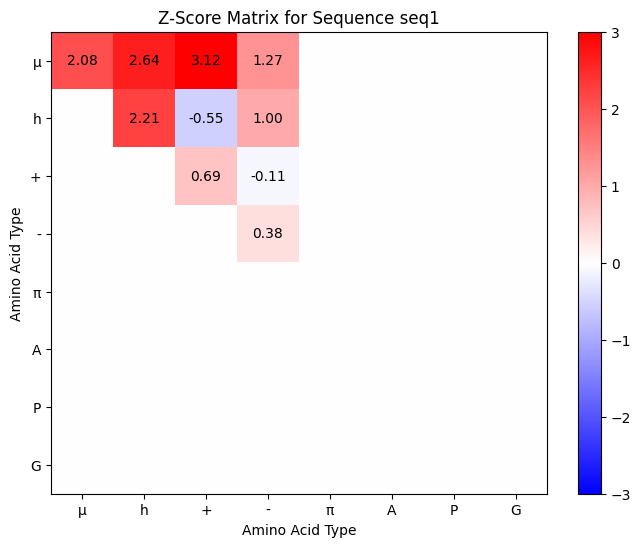

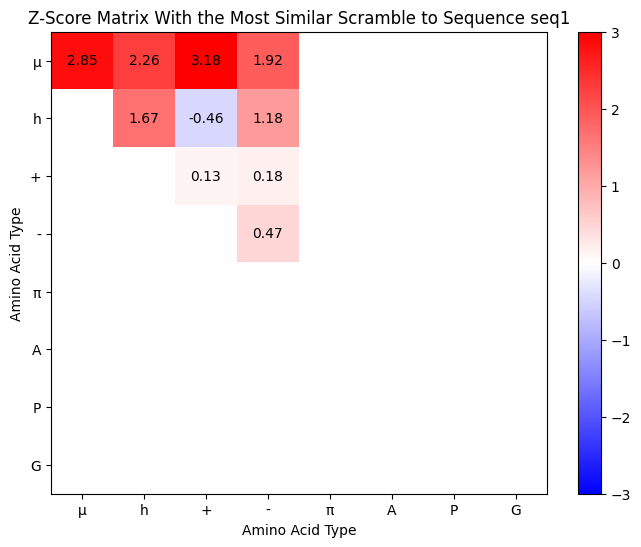

In [6]:
SeqObj = SequenceParameters('MADKDFGLNDIVEMKKPHPCGANSWKIIRMGMDIRIKCEGCSHSVMIPRREFERKLKKVLVKHEEPTS')
SeqObj.save_zscoresAndPlots(num_scrambles=100000, random_seed=None)


In [14]:
SecObj2 = SequenceParameters('MADKDFGLNDIVEMKKPHPCGANSWKIIRMGMDIRIKCEGCSHSVMIPRREFERKLKKVLVKHEEPTS')
SecObj2.get_kappa()

0.15316382219826957